# imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import mode as scipy_mode


import librosa ## used to deal with audio files
import librosa.display

# very important note 
you need to change the way you read data because mono/stereo wav/mp3 types are gives as input

# EDA

In [3]:
labels_df = pd.read_csv('../Data/filtered_data_labeled.tsv', sep='\t')
labels_df.head(5)

client_id  \
0  5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...   
1  5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...   
2  5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...   
3  5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...   
4  5001d9a0d3f8f5aae6f386f70713b2d5d046edc7ba0068...   

                           path  \
0  common_voice_en_19687170.mp3   
1  common_voice_en_19687171.mp3   
2  common_voice_en_19687172.mp3   
3  common_voice_en_19687173.mp3   
4  common_voice_en_19687174.mp3   

                                            sentence  up_votes  down_votes  \
0                   He associated with the Formists.         2           1   
1  The "ultra accelerator" injection gives Derric...         2           1   
2  Despite running as a joke, candidates have won...         2           0   
3  Stoner also guest-starred in the television dr...         2           0   
4           Rainelle was named for the Raine family.         2           0   

       age  gender accent  label  
0  fifties  female     us      3  
1  fifties  female     us      3  
2  fifties  female     us      3  
3  fifties  female     us      3  
4  fifties  female     us      3

In [4]:
nulls = labels_df.isnull().sum()
print(nulls[nulls > 0])
# accent wont affect gender classification

accent    56244
dtype: int64


In [5]:
labels_df.describe()

up_votes     down_votes          label
count  209791.000000  209791.000000  209791.000000
mean        2.225305       0.172662       0.603953
std         1.504034       0.490545       0.998547
min         2.000000       0.000000       0.000000
25%         2.000000       0.000000       0.000000
50%         2.000000       0.000000       0.000000
75%         2.000000       0.000000       1.000000
max       281.000000      81.000000       3.000000

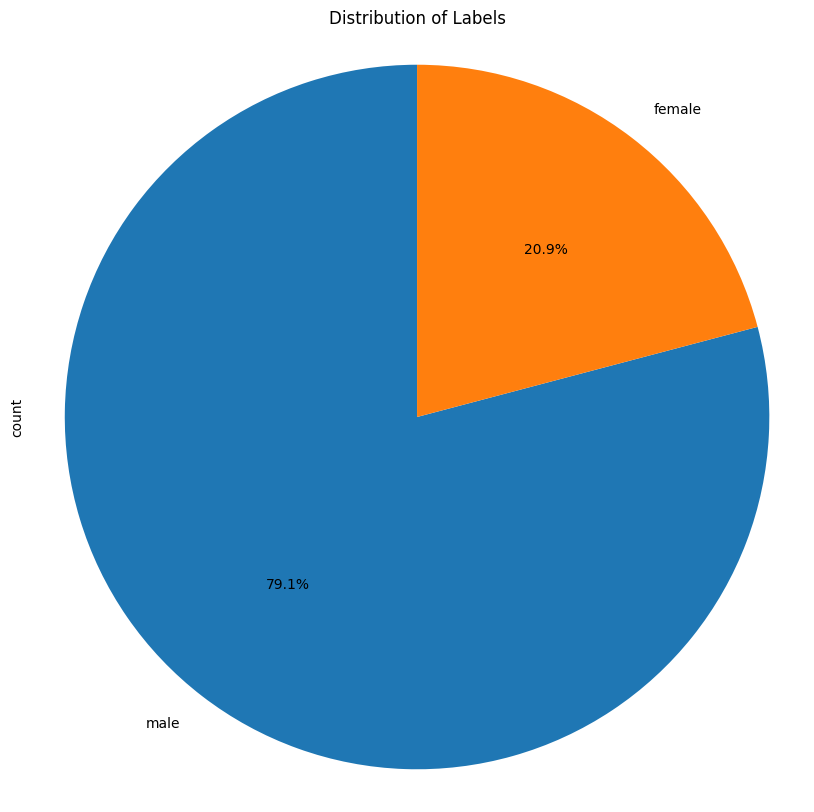

In [6]:
labels_df["gender"].value_counts().plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Labels')
plt.show()

In [ ]:
audio, sr = librosa.load("../Data/common_voice_en_19687170.mp3")


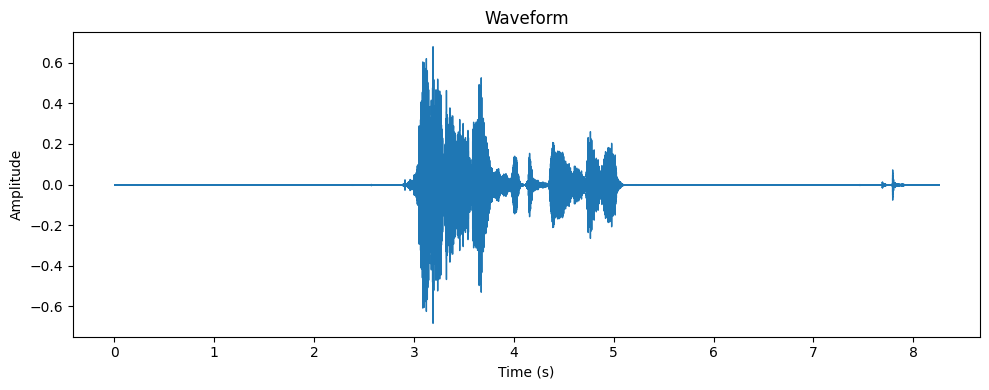

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load("../Data/common_voice_en_19687170.mp3")  # y = audio time series, sr = sampling rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


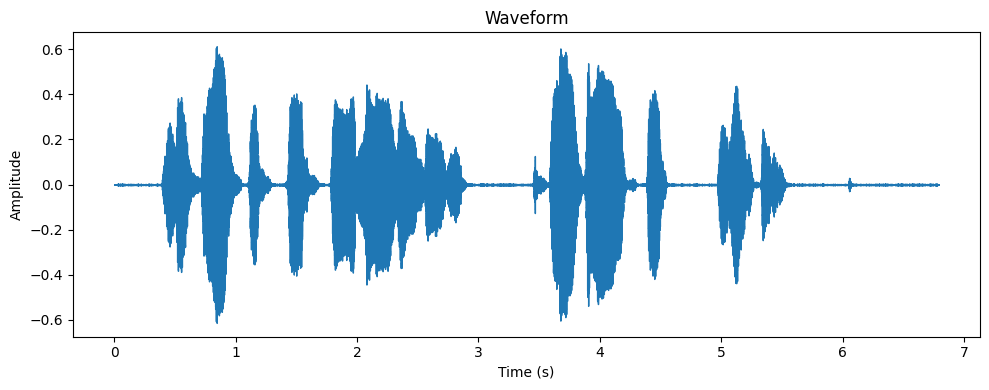

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load("../Data/common_voice_en_18841721.mp3")  # y = audio time series, sr = sampling rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


In [21]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_19687170.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
audio, sr = librosa.load('../Data/common_voice_en_19687170.mp3', sr=None)
Audio(data=audio, rate=sr)


In [23]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_18841721.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
audio, sr = librosa.load('../Data/common_voice_en_18841721.mp3', sr=None)
Audio(data=audio, rate=sr)


1- check on loudness and see if some notmalization needed(high variance in loudness)<br>
2-you need to change the way you read data because mono/stereo wav/mp3 types are gives as input<br>
3-audios lengths distribution(needs to be normalized)<br>
4-noise

In [8]:
from tqdm import tqdm

def get_loudness_dist(labels_df: pd.DataFrame): 
    loudness_values = []
    paths = []
    failed_to_load_mp3 = 0
    failed_to_load_wav = 0

    for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
        audio_path = os.path.join('../Data/', row['path'])

        if os.path.isfile(audio_path):
            try:
                audio, sr = librosa.load(audio_path, sr=None, mono=True)

                # Compute RMS (Root Mean Square) energy
                rms = librosa.feature.rms(y=audio)
                mean_rms = float(np.mean(rms))

                # Optionally convert to dB: librosa.amplitude_to_db(rms)
                loudness_values.append(mean_rms)
                paths.append(audio_path)

                del audio  # free memory

            except Exception as e:
                if audio_path.endswith('.mp3'):
                    failed_to_load_mp3 += 1
                elif audio_path.endswith('.wav'):
                    failed_to_load_wav += 1
                else:
                    print(f"Failed to load {audio_path}: {e}")
        else:
            pass

    print(f"\nFailed to load {failed_to_load_mp3} mp3 files")
    print(f"Failed to load {failed_to_load_wav} wav files")
    print(f"Total successfully processed audio files: {len(paths)}")

    # Return loudness data as DataFrame
    loudness_df = pd.DataFrame({
        "path": paths,
        "loudness_rms": loudness_values
    })

    return loudness_df

loudness_df = get_loudness_dist(labels_df)

  0%|          | 4/209791 [00:17<192:57:52,  3.31s/it] C:\Users\Karim Mahmoud\AppData\Local\Temp\ipykernel_16920\1686049757.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_path, sr=None, mono=True)
d:\anaconda\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
100%|██████████| 209791/209791 [37:15<00:00, 93.83it/s]  


Failed to load 36701 mp3 files
Failed to load 0 wav files
Total successfully processed audio files: 167530


In [13]:
loudness_df.sort_values(by='loudness_rms', ascending=True, inplace=True)

In [14]:
loudness_df.head(5)

path  loudness_rms
73925    ../Data/common_voice_en_195777.mp3      0.000124
3579   ../Data/common_voice_en_19718171.mp3      0.000281
3586   ../Data/common_voice_en_19718734.mp3      0.000315
3583   ../Data/common_voice_en_19718533.mp3      0.000324
77480  ../Data/common_voice_en_17269611.mp3      0.000336

In [16]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_195777.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
audio, sr = librosa.load('../Data/common_voice_en_195777.mp3', sr=None)
Audio(data=audio, rate=sr)


In [15]:
loudness_df.tail(5)

path  loudness_rms
75232   ../Data/common_voice_en_18611747.mp3      0.448355
2168    ../Data/common_voice_en_18720954.mp3      0.458480
101231  ../Data/common_voice_en_17304208.mp3      0.471449
101222  ../Data/common_voice_en_17304191.mp3      0.476161
2167    ../Data/common_voice_en_18720952.mp3      0.489195

In [17]:
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/common_voice_en_18720952.mp3')

# Or if you have the audio data and sampling rate from librosa
import librosa
audio, sr = librosa.load('../Data/common_voice_en_18720952.mp3', sr=None)
Audio(data=audio, rate=sr)


In [23]:
#average loudness index
path=loudness_df.iloc[loudness_df.shape[0]//2]['path'] ## since sorted
# If you have the file path
Audio(filename=path)

# Or if you have the audio data and sampling rate from librosa
import librosa
audio, sr = librosa.load(path, sr=None)
Audio(data=audio, rate=sr)

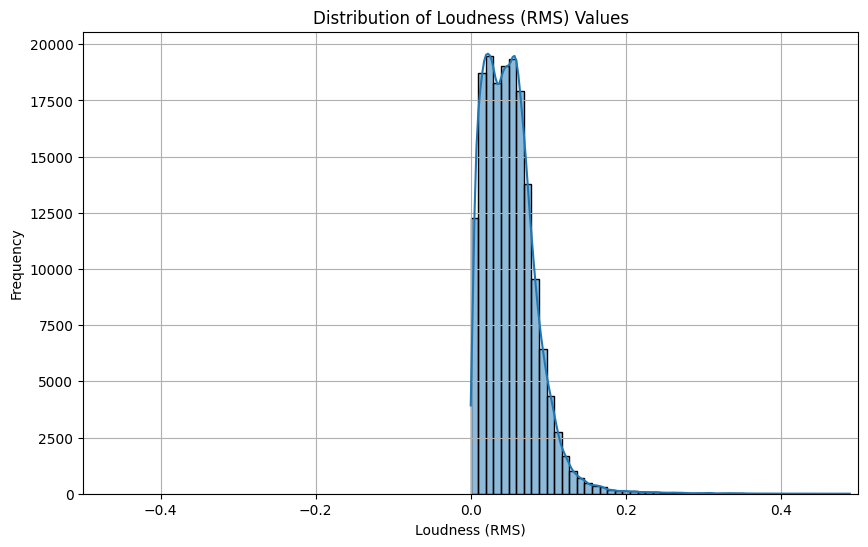

In [9]:
# distribution of loudness values
plt.figure(figsize=(10, 6))
sns.histplot(loudness_df['loudness_rms'], bins=50, kde=True)
plt.title('Distribution of Loudness (RMS) Values')
plt.xlabel('Loudness (RMS)')
plt.ylabel('Frequency')
plt.xlim(-0.5, 0.5)
plt.grid()
plt.show()

In [24]:
def add_audio_durations(labels_df: pd.DataFrame) -> pd.DataFrame:
    durations = []

    for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
        path = os.path.join('../Data/', row['path'])

        try:
            audio, sr = librosa.load(path, sr=None)
            dur = librosa.get_duration(y=audio, sr=sr)
        except Exception:
            dur = None  # Could not load

        durations.append(dur)

    labels_df['duration'] = durations
    return labels_df


  0%|          | 3/209791 [00:00<1:59:12, 29.33it/s]C:\Users\Karim Mahmoud\AppData\Local\Temp\ipykernel_16920\1120509967.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(path, sr=None)
d:\anaconda\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
100%|██████████| 209791/209791 [27:13<00:00, 128.44it/s] 


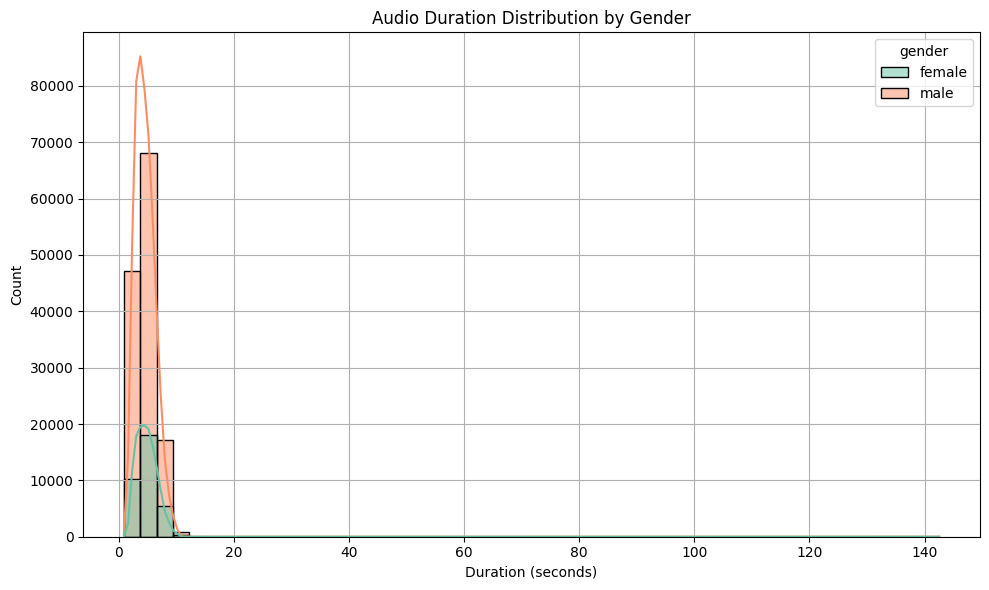

In [25]:
def plot_duration_distribution(df: pd.DataFrame):
    df_clean = df.dropna(subset=['duration'])

    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_clean, x='duration', hue='gender', bins=50, kde=True, palette='Set2')
    plt.title("Audio Duration Distribution by Gender")
    plt.xlabel("Duration (seconds)")
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
labels_df = add_audio_durations(labels_df)
plot_duration_distribution(labels_df)

In [27]:
labels_df["duration"].describe()
#make dataframe containing  max and min duration paths
def get_min_max_duration_paths(df: pd.DataFrame) -> pd.DataFrame:
    min_duration = df['duration'].min()
    max_duration = df['duration'].max()

    min_duration_path = df[df['duration'] == min_duration]['path'].values[0]
    max_duration_path = df[df['duration'] == max_duration]['path'].values[0]

    return pd.DataFrame({
        'min_duration': [min_duration],
        'min_duration_path': [min_duration_path],
        'max_duration': [max_duration],
        'max_duration_path': [max_duration_path]
    })

min_max_duration_df = get_min_max_duration_paths(labels_df)

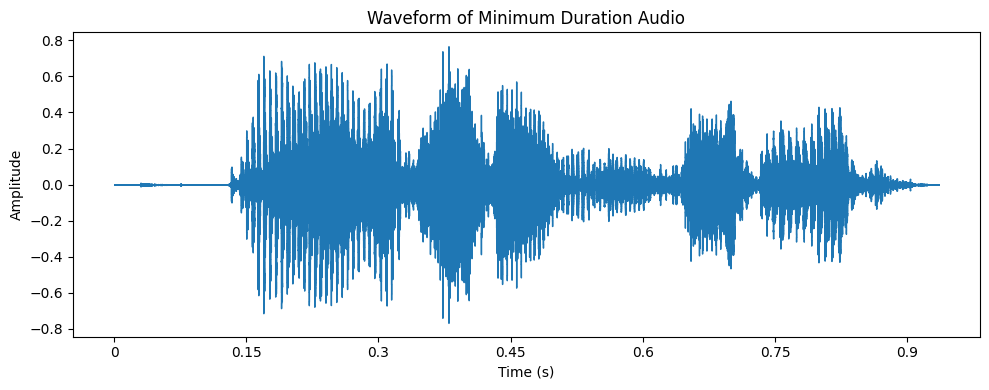

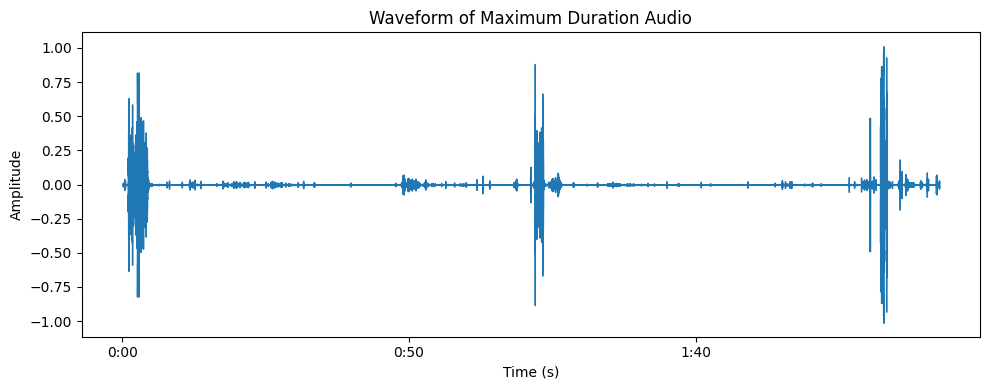

In [29]:
#draw the waveforms of the min and max duration audio files
def plot_waveform(audio_path: str, title: str):
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

# Plot the waveform for the minimum duration audio file
plot_waveform("../Data/"+min_max_duration_df['min_duration_path'][0], 'Waveform of Minimum Duration Audio')
# Plot the waveform for the maximum duration audio file
plot_waveform("../Data/"+min_max_duration_df['max_duration_path'][0], 'Waveform of Maximum Duration Audio')

In [30]:
# listen to the min and max duration audio files
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/'+min_max_duration_df['min_duration_path'][0])

In [31]:
# listen to the min and max duration audio files
from IPython.display import Audio

# If you have the file path
Audio(filename='../Data/'+min_max_duration_df['max_duration_path'][0])

In [21]:
import noisereduce as nr
import librosa 

# Load the audio file
data, rate = librosa.load("../Data/common_voice_en_19687170.mp3", sr=None)

# Perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)

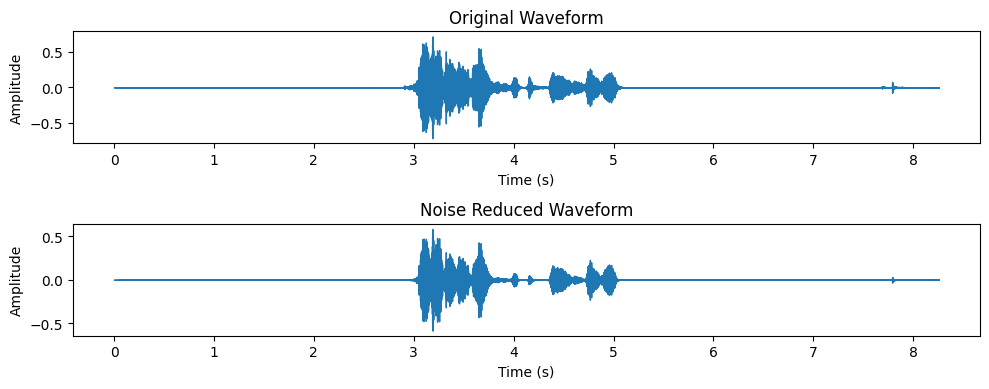

In [22]:
#draw the waveforms of the min and max duration audio files
def plot_waveform_original_vs_noise_removed(y,reduced_noise,sr):
    plt.figure(figsize=(10, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Original Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    librosa.display.waveshow(reduced_noise, sr=sr)
    plt.title('Noise Reduced Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

plot_waveform_original_vs_noise_removed(data,reduced_noise,rate)

In [20]:
from IPython.display import Audio
# Load the audio file
data, rate = librosa.load("../Data/common_voice_en_19687170.mp3", sr=None)

# Play original audio
print("🎧 Original Audio:")
display(Audio(data, rate=rate))

# Perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)

# Play noise-reduced audio
print("🔇 Denoised Audio:")
display(Audio(reduced_noise, rate=rate))

🎧 Original Audio:


🔇 Denoised Audio:


In [32]:
import soundfile as sf
def denoise_with_librosa(df, path_column="path", output_dir="denoised_data"):
    """
    Denoise audio files using librosa and save to a new folder.

    Parameters:
    - df: pandas DataFrame with a column of audio file paths
    - path_column: column name containing audio paths
    - output_dir: directory to save the denoised .wav files
    """
    cd_back="../"
    os.makedirs(cd_back+output_dir, exist_ok=True)

    for idx, row in df.iterrows():
        file_path = row[path_column]
        try:
            # Load with librosa (supports mp3 and wav)
            data, rate = librosa.load("../Data/"+file_path, sr=None)
            # Apply noise reduction
            reduced_noise = nr.reduce_noise(y=data, sr=rate)

            # Construct output path
            base_name = os.path.splitext(os.path.basename(file_path))[0]
            out_path = os.path.join(cd_back+output_dir, base_name + ".wav")

            # Save as .wav using soundfile
            sf.write(out_path, reduced_noise, rate)
            if(idx % 1000 == 0):
                print(f"✅ Processed {idx}")
        
        except Exception as e:
            pass
            # print(f"❌ Error with {file_path}: {e}")

denoise_with_librosa(labels_df, path_column="path", output_dir="denoised_data")

✅ Processed 0


C:\Users\Karim Mahmoud\AppData\Local\Temp\ipykernel_24064\1219015355.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  data, rate = librosa.load("../Data/"+file_path, sr=None)
d:\anaconda\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


✅ Processed 1000
✅ Processed 2000
✅ Processed 3000
✅ Processed 4000
✅ Processed 5000
✅ Processed 6000
✅ Processed 7000
✅ Processed 8000
✅ Processed 9000
✅ Processed 10000
✅ Processed 11000
✅ Processed 12000
✅ Processed 13000
✅ Processed 14000
✅ Processed 15000
✅ Processed 16000
✅ Processed 17000
✅ Processed 18000
✅ Processed 19000
✅ Processed 20000
✅ Processed 21000
✅ Processed 22000
✅ Processed 23000
✅ Processed 24000
✅ Processed 25000
✅ Processed 26000
✅ Processed 28000
✅ Processed 30000
✅ Processed 31000
✅ Processed 32000
✅ Processed 33000
✅ Processed 34000
✅ Processed 35000
✅ Processed 36000
✅ Processed 37000
✅ Processed 38000
✅ Processed 39000
✅ Processed 40000
✅ Processed 41000
✅ Processed 42000
✅ Processed 43000
✅ Processed 44000
✅ Processed 45000
✅ Processed 46000
✅ Processed 47000
✅ Processed 48000
✅ Processed 49000
✅ Processed 50000
✅ Processed 52000
✅ Processed 54000
✅ Processed 55000
✅ Processed 56000
✅ Processed 57000
✅ Processed 58000
✅ Processed 59000
✅ Processed 60000
✅

In [ ]:
from tqdm import tqdm

def extract_audio_features_by_gender(labels_df: pd.DataFrame):
    feature_list = []
    failed_to_load = 0

    for row in tqdm(labels_df.itertuples(index=False), total=len(labels_df)):
        audio_path = os.path.join('../Data/', row.path)

        if not os.path.isfile(audio_path):
            # print(f"File not found: {audio_path}")
            continue

        try:
            y, sr = librosa.load(audio_path, sr=None, mono=True)

            if len(y) == 0:
                print(f"Empty audio file: {audio_path}")
                continue

            stft = np.abs(librosa.stft(y))
            if stft.shape[1] == 0:
                print(f"Invalid STFT shape in: {audio_path}")
                continue

            freqs = librosa.fft_frequencies(sr=sr)
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
            spectral_flatness = librosa.feature.spectral_flatness(y=y, sr=sr)[0]
            spectral_entropy = -np.sum((stft**2) * np.log(stft**2 + 1e-10), axis=0) / np.log(stft.shape[0])

            meanfreq = np.sum(freqs[:, None] * stft, axis=0) / (np.sum(stft, axis=0) + 1e-6)
            mode_freq = freqs[np.argmax(stft, axis=0)]
            dominant_freqs = mode_freq

            # Fundamental frequency
            pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
            fundamental_freqs = pitches[magnitudes > np.median(magnitudes)]

            features = {
                "gender": row.gender,
                "meanfreq": float(np.mean(meanfreq) / 1000),
                "sd": float(np.std(meanfreq) / 1000),
                "median": float(np.median(meanfreq) / 1000),
                "Q25": float(np.percentile(meanfreq, 25) / 1000),
                "Q75": float(np.percentile(meanfreq, 75) / 1000),
                "IQR": float(stats.iqr(meanfreq) / 1000),
                "skew": float(stats.skew(meanfreq)),
                "kurt": float(stats.kurtosis(meanfreq)),
                "sp.ent": float(np.mean(spectral_entropy)),
                "sfm": float(np.mean(spectral_flatness)),
                "mode": float(scipy_mode(mode_freq, keepdims=True)[0][0] / 1000),
                "centroid": float(np.mean(spectral_centroid) / 1000),
                "meanfun": float(np.mean(fundamental_freqs)) if len(fundamental_freqs) > 0 else 0,
                "minfun": float(np.min(fundamental_freqs)) if len(fundamental_freqs) > 0 else 0,
                "maxfun": float(np.max(fundamental_freqs)) if len(fundamental_freqs) > 0 else 0,
                "meandom": float(np.mean(dominant_freqs)),
                "mindom": float(np.min(dominant_freqs)),
                "maxdom": float(np.max(dominant_freqs)),
                "dfrange": float(np.max(dominant_freqs) - np.min(dominant_freqs)),
                "modindx": float(np.std(fundamental_freqs) / np.mean(fundamental_freqs)) if len(fundamental_freqs) > 0 and np.mean(fundamental_freqs) > 0 else 0,
            }

            feature_list.append(features)

            del y, stft, pitches, magnitudes

        except Exception as e:
            failed_to_load += 1
            # print(f"Failed to process {audio_path}: {e}")
            continue

    print(f"\nFinished processing. Failed to load {failed_to_load} files.")
    return pd.DataFrame(feature_list)

In [40]:
def plot_feature_distribution(df: pd.DataFrame):
    features = [col for col in df.columns if col != 'gender']  
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=feature, hue='gender', kde=True, bins=20, multiple='stack', palette='Set2')
        plt.title(f'Distribution of {feature} by Gender')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

df_features = extract_audio_features_by_gender(labels_df)
plot_feature_distribution(df_features)

  0%|          | 4/209791 [00:00<4:31:41, 12.87it/s]C:\Users\Karim Mahmoud\AppData\Local\Temp\ipykernel_24064\1142283726.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None, mono=True)
  0%|          | 19/209791 [00:00<2:27:35, 23.69it/s]

File not found: ../Data/common_voice_en_18841724.mp3


  0%|          | 52/209791 [00:02<2:38:39, 22.03it/s]

File not found: ../Data/common_voice_en_18522554.mp3


  0%|          | 73/209791 [00:03<2:52:25, 20.27it/s]

File not found: ../Data/common_voice_en_19654105.mp3


  0%|          | 101/209791 [00:05<3:01:41, 19.23it/s]

File not found: ../Data/common_voice_en_17530062.mp3


  0%|          | 115/209791 [00:05<2:42:48, 21.46it/s]

File not found: ../Data/common_voice_en_19334685.mp3


  0%|          | 151/209791 [00:07<2:31:47, 23.02it/s]

File not found: ../Data/common_voice_en_18816486.mp3


  0%|          | 168/209791 [00:08<3:00:31, 19.35it/s]

File not found: ../Data/common_voice_en_20135577.mp3


  0%|          | 224/209791 [00:11<2:46:35, 20.97it/s]

File not found: ../Data/common_voice_en_18920990.mp3


  0%|          | 272/209791 [00:13<2:39:02, 21.96it/s]

File not found: ../Data/common_voice_en_19612759.mp3


  0%|          | 290/209791 [00:14<3:03:14, 19.06it/s]

File not found: ../Data/common_voice_en_19630084.mp3


  0%|          | 380/209791 [00:20<2:35:48, 22.40it/s]

File not found: ../Data/common_voice_en_18991299.mp3
File not found: ../Data/common_voice_en_18991300.mp3


  0%|          | 602/209791 [00:33<3:23:49, 17.11it/s]

File not found: ../Data/common_voice_en_19613476.mp3


  0%|          | 706/209791 [00:40<2:46:31, 20.93it/s]

File not found: ../Data/common_voice_en_19602798.mp3
File not found: ../Data/common_voice_en_18589621.mp3


  0%|          | 744/209791 [00:43<3:27:16, 16.81it/s]

File not found: ../Data/common_voice_en_19729597.mp3


  0%|          | 810/209791 [00:47<3:26:51, 16.84it/s]

File not found: ../Data/common_voice_en_19410103.mp3


  0%|          | 832/209791 [00:48<3:36:04, 16.12it/s]

File not found: ../Data/common_voice_en_19065732.mp3


  0%|          | 872/209791 [00:51<3:15:47, 17.78it/s]

File not found: ../Data/common_voice_en_19802938.mp3


  0%|          | 891/209791 [00:52<3:03:58, 18.92it/s]

File not found: ../Data/common_voice_en_19976221.mp3


  0%|          | 943/209791 [00:56<3:30:36, 16.53it/s]

File not found: ../Data/common_voice_en_18685162.mp3


  0%|          | 1003/209791 [01:00<3:29:15, 16.63it/s]

File not found: ../Data/common_voice_en_19679303.mp3


  0%|          | 1014/209791 [01:00<4:02:23, 14.36it/s]

File not found: ../Data/common_voice_en_19504774.mp3


  1%|          | 1102/209791 [01:06<3:23:32, 17.09it/s]

File not found: ../Data/common_voice_en_18669922.mp3


  1%|          | 1181/209791 [01:11<2:37:17, 22.11it/s]

File not found: ../Data/common_voice_en_17875985.mp3


  1%|          | 1196/209791 [01:11<3:28:47, 16.65it/s]


KeyboardInterrupt: 

In [ ]:
def extract_stft_features_by_gender(labels_df: pd.DataFrame):
    feature_list = []
    failed_to_load = 0

    for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
        audio_path = os.path.join('../Data/', row['path'])

        if not os.path.isfile(audio_path):
            continue

        try:
            y, sr = librosa.load(audio_path, sr=None, mono=True)

            # Compute the Short-Time Fourier Transform (STFT)
            stft = np.abs(librosa.stft(y))

            # Calculate statistics for each frame in STFT
            stft_features = {
                'gender': row['gender'],
                'stft_mean': np.mean(stft),
                'stft_std': np.std(stft),
                'stft_min': np.min(stft),
                'stft_max': np.max(stft),
                'stft_range': np.max(stft) - np.min(stft),
                'stft_kurtosis': float(np.kurtosis(stft.flatten())),  # Flatten to calculate kurtosis
                'stft_skew': float(np.skew(stft.flatten()))  # Flatten to calculate skewness
            }

            feature_list.append(stft_features)

        except Exception as e:
            failed_to_load += 1
            continue

    print(f"Failed to load {failed_to_load} files.")
    return pd.DataFrame(feature_list)


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

def extract_mfcc_features_by_gender(labels_df: pd.DataFrame, n_mfcc: int = 13):
    feature_list = []
    failed_to_load = 0

    for _, row in tqdm(labels_df.iterrows(), total=len(labels_df)):
        audio_path = os.path.join('../Data/', row['path'])

        if not os.path.isfile(audio_path):
            continue

        try:
            y, sr = librosa.load(audio_path, sr=None, mono=True)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

            mfcc_features = {
                'gender': row['gender']
            }

            for i in range(n_mfcc):
                mfcc_features[f'mfcc_{i+1}_mean'] = np.mean(mfccs[i])
                mfcc_features[f'mfcc_{i+1}_std'] = np.std(mfccs[i])

            feature_list.append(mfcc_features)

        except Exception as e:
            failed_to_load += 1
            continue

    print(f"Failed to load {failed_to_load} files.")
    return pd.DataFrame(feature_list)
